In [240]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#import scikit-learn as sk

In [241]:
times = pd.read_csv("all_stocks_5yr.csv", encoding = "ISO-8859-1")

In [242]:
stock = times.groupby("Name").agg(np.mean)

In [243]:
stock["volume"] = stock["volume"]/1000000

In [244]:
plot = stock.where(stock["volume"] < 4).where(stock["close"] < 50)

Text(0.5, 1.0, 'Close v Volume')

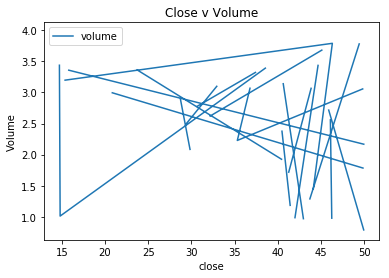

In [245]:
plot.plot(x = "close", y = "volume")
plt.ylabel("Volume")
plt.title("Close v Volume")

In [246]:
#For this assignment, I experimented with pandas and played with my data. I wanted to plot this data, so first I had to group it into plotable data structure. So first I grouped the data into simpiler columns. Then I put the volume, which was too large, into smaller, more readable values. Then I removed the extreme values fo the dataset. Finally, I plotted my dataset. 

In [247]:
stocks = pd.read_csv("fundamentals.csv", encoding = "ISO-8859-1")

In [248]:
stocks = stocks[["Ticker Symbol","Period Ending", "Net Cash Flow", "Cost of Revenue", "Earnings Before Interest and Tax", "Gross Profit", "Investments","Long-Term Debt","Total Revenue"]]

In [249]:
stocks[["Net Cash Flow", "Cost of Revenue", "Earnings Before Interest and Tax", "Gross Profit", "Investments","Long-Term Debt","Total Revenue"]] = stocks[["Net Cash Flow", "Cost of Revenue", "Earnings Before Interest and Tax", "Gross Profit", "Investments","Long-Term Debt","Total Revenue"]]/1000000000


In [250]:
stocks.head()

,Ticker Symbol,Period Ending,Net Cash Flow,Cost of Revenue,Earnings Before Interest and Tax,Gross Profit,Investments,Long-Term Debt,Total Revenue
0,AAL,2012-12-31,0.19700,10.499000,-1.813000,14.356000,0.306,7.116000,24.855000
1,AAL,2013-12-31,0.66000,11.019000,-1.324000,15.724000,-1.181,15.353000,26.743000
2,AAL,2014-12-31,-0.14600,15.620000,4.099000,27.030000,1.799,16.043000,42.650000
3,AAL,2015-12-31,-0.60400,11.096000,5.496000,29.894000,0.443,18.330000,40.990000
4,AAP,2012-12-29,0.54021,3.106967,0.657915,3.098036,0.000,0.604461,6.205003


In [251]:
prices = stocks.merge(times[["Name", "date", "close"]], left_on = ["Period Ending","Ticker Symbol"], right_on = ["date", "Name"]).drop(columns = ["Name", "date"])

Text(0.5, 1.0, 'Net Cash Flow v Gross Profit')

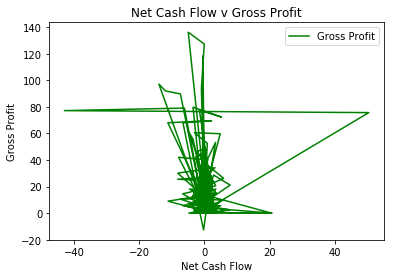

In [252]:
prices.plot(x = "Net Cash Flow", y = "Gross Profit", color = "green")
plt.ylabel("Gross Profit")
plt.title("Net Cash Flow v Gross Profit")

Text(0.5, 1.0, 'Stock Prices by Name')

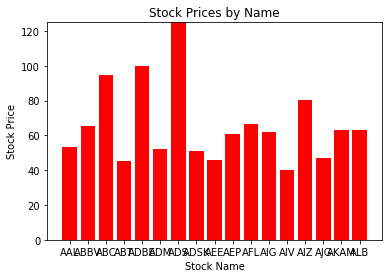

In [253]:
plt.bar(x = "Ticker Symbol", height = "close", data = prices.head(50), color = "red")
plt.xlabel("Stock Name")
plt.ylabel("Stock Price")
plt.ylim(0, 125)
plt.title("Stock Prices by Name")

Text(0.5, 1.0, 'Stock Prices Barplot')

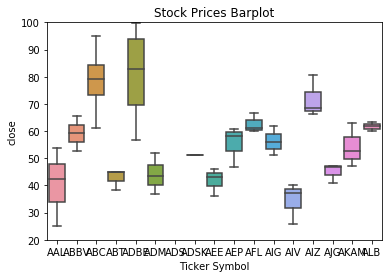

In [254]:
sns.boxplot(x = "Ticker Symbol", y = "close", data = prices.head(50))
plt.ylim(20, 100)
plt.title("Stock Prices Barplot")

In [255]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit([[0, 0], [1, 1], [2, 2]], [0, 1, 2])

reg.coef_

array([0.5, 0.5])

In [256]:
#stocks.where("Period Ending" == 2012-12-31)#.merge(stocks, on = "Period Ending", how ="left")

In [257]:
for i in range(len(list(stocks["Period Ending"]))):
    if(stocks.loc[i]["Period Ending"][0:4] == '2012'):
        stocks.at[i,"Period Ending"] = "2013-02-08"

In [258]:
for i in range(len(list(stocks["Period Ending"]))):
    if(stocks.loc[i]["Period Ending"][0:4] == '2015'):
        stocks.at[i,"Period Ending"] = "2015"

In [259]:
begin = stocks.where(stocks["Period Ending"] == "2013-02-08").dropna()

In [260]:
end = stocks.where(stocks["Period Ending"] == "2015").dropna()

In [261]:
data = begin.merge(end, on = "Ticker Symbol", suffixes = ('_start', '_end'))

In [263]:
data.head()

,Ticker Symbol,Period Ending_start,Net Cash Flow_start,Cost of Revenue_start,Earnings Before Interest and Tax_start,Gross Profit_start,Investments_start,Long-Term Debt_start,Total Revenue_start,Period Ending_end,Net Cash Flow_end,Cost of Revenue_end,Earnings Before Interest and Tax_end,Gross Profit_end,Investments_end,Long-Term Debt_end,Total Revenue_end
0,AAL,2013-02-08,0.19700,10.499000,-1.813000,14.356000,0.306,7.116000,24.855000,2015,-0.6040,11.096000,5.496000,29.894000,0.443,18.330000,40.990000
1,AAP,2013-02-08,0.54021,3.106967,0.657915,3.098036,0.000,0.604461,6.205003,2015,-1.0078,5.390248,0.854802,4.453613,0.000,1.636311,9.843861
2,ABBV,2013-02-08,5.87400,4.508000,5.809000,13.872000,-1.397,14.630000,18.380000,2015,0.0510,4.500000,7.331000,18.359000,0.029,29.240000,22.859000
3,ABT,2013-02-08,3.98900,8.899000,0.100000,10.151000,-3.062,18.085000,19.050000,2015,0.9380,8.747000,3.346000,11.658000,-0.821,5.871000,20.405000
4,ADM,2013-02-08,0.85000,86.936000,2.426000,3.623000,-0.445,6.456000,90.559000,2015,-0.1890,63.682000,2.592000,4.020000,0.035,5.779000,67.702000


In [264]:
#cash_flow = data["Net Cash Flow_end"].apply(np.array) - data["Net Cash Flow_start"].apply(np.array)

In [265]:
#cash_flow = data["Net Cash Flow_end"].apply(np.array) - data["Net Cash Flow_start"].apply(np.array)

In [266]:
# from sklearn import linear_model
# reg = linear_model.LinearRegression()
# reg.fit(data[["Net Cash Flow_start"]], data[["Net Cash Flow_end"]])

In [267]:
times = times[["Name","date", "close"]]

In [268]:
times.head()

,Name,date,close
0,AAL,2013-02-08,14.75
1,AAL,2013-02-11,14.46
2,AAL,2013-02-12,14.27
3,AAL,2013-02-13,14.66
4,AAL,2013-02-14,13.99


In [269]:
#timings = times.drop_duplicates(["name", "date"])

In [270]:
#begin2 = times.where(times["date"] == "2013").dropna()

In [271]:
#begin2.head()

In [272]:
#end2 = times.where(times["date"] == "2015").dropna()

In [273]:
#timings = times.groupby(["Name"]).first()

In [274]:
#timings.head()

In [275]:
#Look into doing something with first and the datetime stuff

In [276]:
times2 = pd.read_csv("all_stocks_5yr.csv", encoding = "ISO-8859-1")

In [277]:
times2 = times2[["Name","date", "close"]]

In [278]:
#times2.groupby(["Name"]).first()

In [279]:
begin2 = times2.where(times2["date"] == "2013-02-08").dropna()

In [280]:
end2 = times2.where(times2["date"] == "2018-01-02").dropna()

In [281]:
prices = begin2.merge(end2, on = "Name", suffixes = ("_start", "_end"))

In [282]:
start = stocks.where(stocks["Period Ending"] == "2013-02-08").dropna()

In [283]:
prices.head()

,Name,date_start,close_start,date_end,close_end
0,AAL,2013-02-08,14.7500,2018-01-02,52.99
1,AAPL,2013-02-08,67.8542,2018-01-02,172.26
2,AAP,2013-02-08,78.9000,2018-01-02,106.09
3,ABBV,2013-02-08,36.2500,2018-01-02,98.41
4,ABC,2013-02-08,46.8900,2018-01-02,94.04


In [284]:
start = start.rename(columns ={'Ticker Symbol':'Name', 'Period Ending': 'date_start'})

In [285]:
data = start.merge(prices, on=["Name", "date_start"])

In [286]:
data.head()

,Name,date_start,Net Cash Flow,Cost of Revenue,Earnings Before Interest and Tax,Gross Profit,Investments,Long-Term Debt,Total Revenue,close_start,date_end,close_end
0,AAL,2013-02-08,0.19700,10.499000,-1.813000,14.356000,0.306,7.116000,24.855000,14.75,2018-01-02,52.99
1,AAP,2013-02-08,0.54021,3.106967,0.657915,3.098036,0.000,0.604461,6.205003,78.90,2018-01-02,106.09
2,ABBV,2013-02-08,5.87400,4.508000,5.809000,13.872000,-1.397,14.630000,18.380000,36.25,2018-01-02,98.41
3,ABT,2013-02-08,3.98900,8.899000,0.100000,10.151000,-3.062,18.085000,19.050000,34.41,2018-01-02,58.79
4,ADM,2013-02-08,0.85000,86.936000,2.426000,3.623000,-0.445,6.456000,90.559000,30.22,2018-01-02,40.09


In [287]:
data["5 Year Return"] = (data["close_end"] - data["close_start"])*100/(data["close_start"])

In [288]:
cashflow_x = data[["Net Cash Flow"]]

In [289]:
cashflow_x_train = cashflow_x[:175]

In [290]:
cashflow_x_test = cashflow_x[175:]

In [291]:
data_y = data[["5 Year Return"]]

In [292]:
data_y_train = data_y[:175]

In [293]:
data_y_test = data_y[175:]

In [294]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
regr = linear_model.LinearRegression()
regr.fit(cashflow_x_train, data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [295]:
cashflow_predict = regr.predict(cashflow_x_test)

Coefficients: 
 [[1.13141501]]
Mean squared error: 4317.41
Variance score: 0.01


Text(0.5, 1.0, 'Ordinary Least Sqaures Regression (One Variable)')

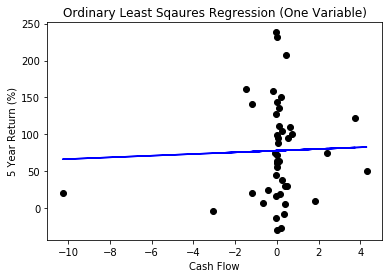

In [296]:
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(data_y_test, cashflow_predict))
print('Variance score: %.2f' % r2_score(data_y_test, cashflow_predict))

plt.scatter(cashflow_x_test,data_y_test, color = "black")
plt.plot(cashflow_x_test,cashflow_predict, color = "blue")
plt.xlabel("Cash Flow")
plt.ylabel("5 Year Return (%)")
plt.title("Ordinary Least Sqaures Regression (One Variable)")

No correlation!

In [297]:
revenueCost = data[["Cost of Revenue"]]

In [298]:
revenueCost_train = revenueCost[:175]

In [299]:
revenueCost_test = revenueCost[175:]

In [300]:
dat = {"cash": cashflow_x_train, "revenue": revenueCost_train}

In [301]:
cashflow_x_train["revenue"] = revenueCost_train

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [302]:
cashflow_x_test["revenue test"] = revenueCost_test

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [303]:
regr.fit(cashflow_x_train[["Net Cash Flow", "revenue"]], data_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [304]:
multi_test_pred = regr.predict(cashflow_x_test[["Net Cash Flow", "revenue test"]])

In [305]:
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(data_y_test, multi_test_pred))
print('Variance score: %.2f' % r2_score(data_y_test, multi_test_pred))

#plt.scatter(revenueCost_test,data_y_test, color = "black")
#plt.plot(revenueCost_test,revenueCost_predict, color = "blue")#

Coefficients: 
 [[ 1.85129902 -0.23615736]]
Mean squared error: 4160.92
Variance score: 0.04


In [306]:
data.columns

Index(['Name', 'date_start', 'Net Cash Flow', 'Cost of Revenue',
       'Earnings Before Interest and Tax', 'Gross Profit', 'Investments',
       'Long-Term Debt', 'Total Revenue', 'close_start', 'date_end',
       'close_end', '5 Year Return'],
      dtype='object')

In [307]:
x_train = data.drop(columns = ["Name", "date_start", "close_start", "date_end", "close_end", "5 Year Return"])[:175]

In [308]:
x_test = data.drop(columns = ["Name", "date_start", "close_start", "date_end", "close_end", "5 Year Return"])[175:]

In [309]:
y_train = data_y_train

In [310]:
y_test = data_y_test

In [311]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [312]:
regress_predict = regr.predict(x_test) 

Coefficients: 
 [[ 2.03844545 -1.10163937 -4.53505744 -0.21336984 -1.11688583  0.09234597
   1.20443808]]
Mean squared error: 4921.52
Variance score: -0.13


Text(0.5, 1.0, 'Ordinary Least Sqaures Regression (Multivariate)')

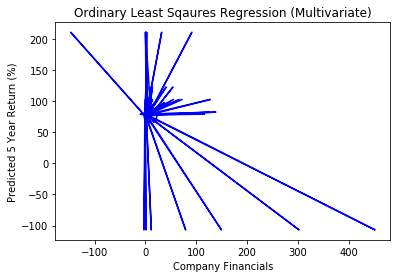

In [342]:
print("Coefficients: \n", regr.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, regress_predict))
print('Variance score: %.2f' % r2_score(y_test, regress_predict))
plt.plot(x_test,regress_predict, color = "blue")
plt.xlabel("Company Financials")
plt.ylabel("Predicted 5 Year Return (%)")
plt.title("Ordinary Least Sqaures Regression (Multivariate)")

In [314]:
ridge = linear_model.Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [315]:
ridge_predict = ridge.predict(x_test)

Coefficients: 
 [[ 2.0361917  -1.10082525 -4.53259054 -0.21348947 -1.11705462  0.09232508
   1.20360182]]
Mean squared error: 4921.17
Variance score: -0.13


Text(0.5, 1.0, 'Ridge Regression (Multivariate)')

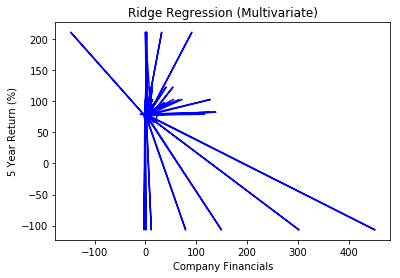

In [316]:
print("Coefficients: \n", ridge.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, ridge_predict))
print('Variance score: %.2f' % r2_score(y_test, ridge_predict))
plt.plot(x_test,ridge_predict, color = "blue")
plt.xlabel("Company Financials")
plt.ylabel("5 Year Return (%)")
plt.title("Ridge Regression (Multivariate)")

In [317]:
ridge2 = linear_model.Ridge(alpha = 0.5)
ridge2.fit(revenueCost_train, data_y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [318]:
ridgeRC_predict = ridge2.predict(revenueCost_test)

Coefficients: 
 [[-0.19231605]]
Mean squared error: 4192.11
Variance score: 0.03


Text(0.5, 1.0, 'Ridge Regression (One Variable)')

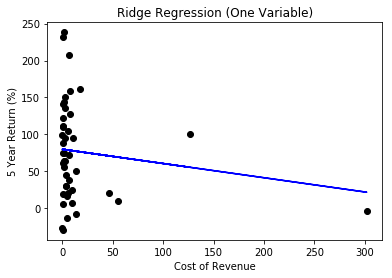

In [319]:
print("Coefficients: \n", ridge2.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(data_y_test, ridgeRC_predict))
print('Variance score: %.2f' % r2_score(data_y_test, ridgeRC_predict))
plt.scatter(revenueCost_test,data_y_test, color = "black")
plt.plot(revenueCost_test, ridgeRC_predict, color = "blue")
plt.xlabel("Cost of Revenue")
plt.ylabel("5 Year Return (%)")
plt.title("Ridge Regression (One Variable)")

In [320]:
from sklearn.linear_model import Lasso
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [321]:
lasso_predict = lasso.predict(x_test)

Coefficients: 
 [ 1.99021142 -1.08727498 -4.5156146  -0.20638687 -1.12243587  0.09186609
  1.19053436]
Mean squared error: 4917.33
Variance score: -0.13


Text(0.5, 1.0, 'Lasso Regression (Multivariate)')

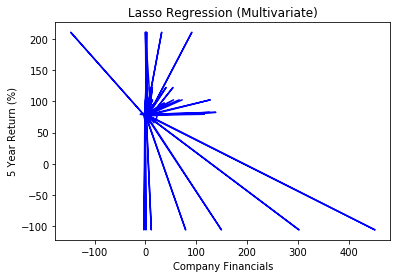

In [322]:
print("Coefficients: \n", lasso.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, lasso_predict))
print('Variance score: %.2f' % r2_score(y_test, lasso_predict))
plt.plot(x_test,lasso_predict, color = "blue")
plt.xlabel("Company Financials")
plt.ylabel("5 Year Return (%)")
plt.title("Lasso Regression (Multivariate)")

In [323]:
lasso2 = linear_model.Lasso(alpha = 0.1)
lasso2.fit(revenueCost_train, data_y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [324]:
lassoRC_predict = lasso2.predict(data_y_test)

Coefficients: 
 [-0.1920781]
Mean squared error: 6276.76
Variance score: -0.45


Text(0.5, 1.0, 'Lasso Regression (One Variable)')

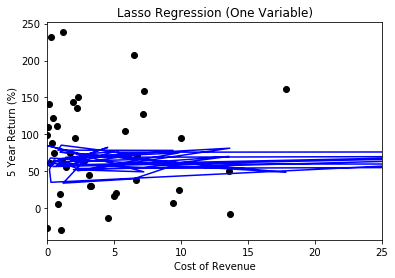

In [325]:
print("Coefficients: \n", lasso2.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(data_y_test, lassoRC_predict))
print('Variance score: %.2f' % r2_score(data_y_test, lassoRC_predict))
plt.scatter(revenueCost_test, data_y_test, color = "black")
plt.plot(revenueCost_test, lassoRC_predict, color = "blue")
plt.xlim(0,25)
plt.xlabel("Cost of Revenue")
plt.ylabel("5 Year Return (%)")
plt.title("Lasso Regression (One Variable)")

In [326]:
from sklearn.linear_model import Lasso
multiLasso = Lasso(alpha = 1)

In [327]:
multiLasso.fit(x_train,y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [328]:
multiLasso_predict = multiLasso.predict(x_test)

Coefficients: 
 [ 1.55617433 -0.95804483 -4.34066043 -0.14356935 -1.17234334  0.08754829
  1.06544696]
Mean squared error: 4881.93
Variance score: -0.12


Text(0.5, 1.0, 'Multi-task Lasso Regression (Multivariate)')

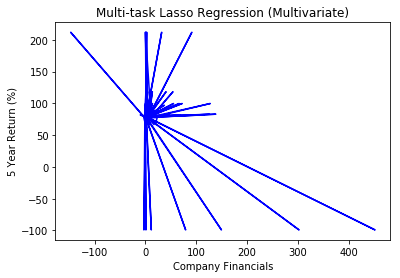

In [329]:
print("Coefficients: \n", multiLasso.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, multiLasso_predict))
print('Variance score: %.2f' % r2_score(y_test, multiLasso_predict))
plt.plot(x_test,multiLasso_predict, color = "blue")
plt.xlabel("Company Financials")
plt.ylabel("5 Year Return (%)")
plt.title("Multi-task Lasso Regression (Multivariate)")

In [330]:
from sklearn import tree
dTree = tree.DecisionTreeRegressor()

In [331]:
dTree = dTree.fit(x_train, y_train)

In [332]:
dTree_predict = dTree.predict(x_test)

Mean squared error: 9946.38
Variance score: -1.29


Text(0.5, 1.0, 'Decision Trees Regression (Multivariate)')

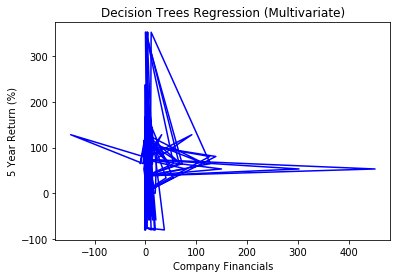

In [333]:
#print("Coefficients: \n", dTree.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, dTree_predict))
print('Variance score: %.2f' % r2_score(y_test, dTree_predict))
plt.plot(x_test,dTree_predict, color = "blue")
plt.xlabel("Company Financials")
plt.ylabel("5 Year Return (%)")
plt.title("Decision Trees Regression (Multivariate)")

In [334]:
multiLasso2 = Lasso(alpha = 1)

In [335]:
multiLasso2.fit(revenueCost_train, data_y_train)

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [336]:
multiLasso2_predict = multiLasso2.predict(revenueCost_test)

Coefficients: 
 [-0.18992478]
Mean squared error: 4192.96
Variance score: 0.03


Text(0.5, 1.0, 'Mulit-task Lasso Regression (One Variable)')

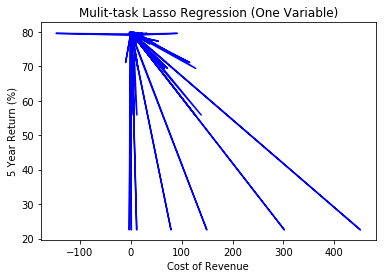

In [337]:
print("Coefficients: \n", multiLasso2.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, multiLasso2_predict))
print('Variance score: %.2f' % r2_score(y_test, multiLasso2_predict))
plt.plot(x_test,multiLasso2_predict, color = "blue")
plt.xlabel("Cost of Revenue")
plt.ylabel("5 Year Return (%)")
plt.title("Mulit-task Lasso Regression (One Variable)")

In [338]:
from sklearn import tree
dTree2 = tree.DecisionTreeRegressor()
dTree2 = dTree.fit(revenueCost_train, data_y_train)

In [339]:
dTree2_predict = dTree2.predict(revenueCost_test)

Mean squared error: 9801.74
Variance score: -1.26


Text(0.5, 1.0, 'Decision Tree Regression (One Variable)')

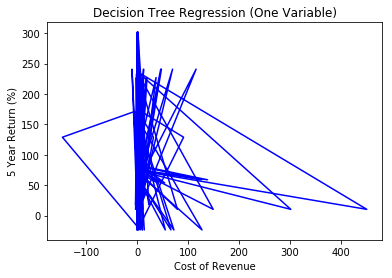

In [340]:
#print("Coefficients: \n", dTree2.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, dTree2_predict))
print('Variance score: %.2f' % r2_score(y_test, dTree2_predict))
plt.plot(x_test,dTree2_predict, color = "blue")
plt.xlabel("Cost of Revenue")
plt.ylabel("5 Year Return (%)")
plt.title("Decision Tree Regression (One Variable)")